# importing libraries

In [3]:
import re
import nltk
import math
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preprocessing

In [4]:
# reading text from the book
with open('pg66677.txt', 'r',encoding='utf-8') as f:
    text = ''.join(f.readlines())

# removing chapter number and heading from text
text = re.sub(r'\n_CHAPTER *[A-Z]*[A-Z]._|\nCHAPTER *[A-Z]*[A-Z].|\n_([\s\S]*?)_|\n([\s\S]*?)THE AUTHOR\'S DECLARATION.', ' ', text)


In [5]:
# converting all text to lower case
text = text.lower()

In [6]:
# with open('book.txt', 'w',encoding='utf-8') as f:
#     f.write(text)

In [7]:
# removing all the puntuations from the text
text = re.sub(r"[^a-zA-Z0-9]", " ", text) 

# Tokenization

In [8]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# splitting text into words
words = word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91741\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Frequency analysis

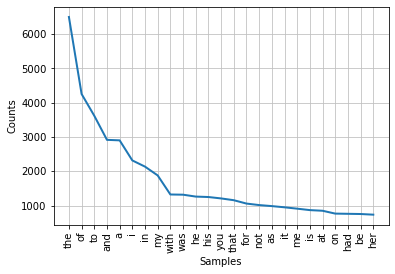

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
# analyzing the the frequency of words
data_analysis = nltk.FreqDist(words)
data_analysis.plot(25, cumulative=False)

# Word Cloud

In [10]:
def listToString(s):       
    str1 = " "      
    return (str1.join(s))
        
# converting list to string        
text = listToString(words) 

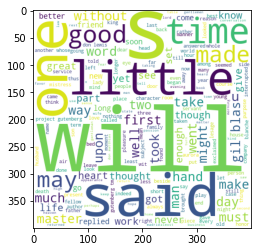

In [11]:
# creating word cloud
wc = WordCloud(background_color="white", max_words=200, width=400, height=400, random_state=1).generate(text)
plt.imshow(wc)

# StopWords

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91741\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# removing the stopwords
words = [w for w in words if w not in stopwords.words("english")]

# WordCloud

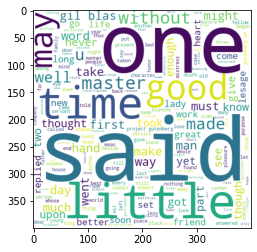

In [ ]:
text = listToString(words) 
# calculating word cloud
wc = WordCloud(background_color="white", max_words=200, width=400, height=400, random_state=1).generate(text)
plt.imshow(wc)

# Frequency distribution

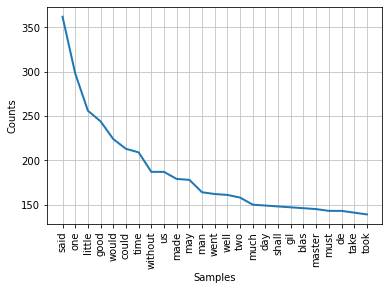

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
# analyzing frequency
data_analysis = nltk.FreqDist(words)
data_analysis.plot(25, cumulative=False)

# wordlength to frequency calculation

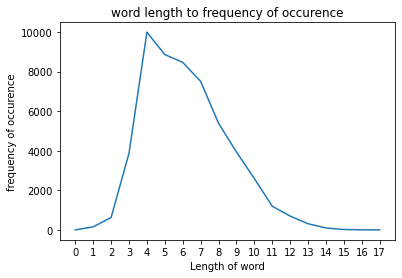

In [ ]:
frequencyarr = []
lengtharr=[]
# finding the largest word in list
res = max(words, key = len)
i=0
fre=0
# calculating the the frequency of words with different length
while(i<=len(res)):
    for word in words:
        if(len(word)==i):
            fre= fre+1
    #print(i,"-",fre)
    frequencyarr.append(fre)
    lengtharr.append(i)
    fre=0
    i=i+1

# plotting the line graph using the values calculated
y = np.array(frequencyarr)
x = np.array(lengtharr)
plt.plot(x, y)
new_list = range(math.floor(min(x)), math.ceil(max(x))+1)
plt.xticks(new_list)
plt.xlabel("Length of word")
plt.ylabel("frequency of occurence")
plt.title("word length to frequency of occurence")
plt.show()





# POS tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91741\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\91741\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [ ]:
# POS tagging the words
nltk.pos_tag(words)

[('project', 'NN'),
 ('gutenberg', 'NN'),
 ('ebook', 'NN'),
 ('adventures', 'VBZ'),
 ('gil', 'JJ'),
 ('blas', 'NNS'),
 ('santillane', 'VBP'),
 ('people', 'NNS'),
 ('world', 'NN'),
 ('mischievous', 'JJ'),
 ('read', 'JJ'),
 ('work', 'NN'),
 ('without', 'IN'),
 ('applying', 'VBG'),
 ('vicious', 'JJ'),
 ('ridiculous', 'JJ'),
 ('characters', 'NNS'),
 ('may', 'MD'),
 ('happen', 'VB'),
 ('contain', 'VB'),
 ('eminent', 'JJ'),
 ('popular', 'JJ'),
 ('individuals', 'NNS'),
 ('protest', 'VBP'),
 ('publicly', 'RB'),
 ('pretended', 'VBN'),
 ('discovery', 'NN'),
 ('likenesses', 'VBZ'),
 ('purpose', 'JJ'),
 ('represent', 'NN'),
 ('human', 'JJ'),
 ('life', 'NN'),
 ('historically', 'RB'),
 ('exists', 'VBZ'),
 ('god', 'NN'),
 ('forbid', 'NN'),
 ('hold', 'VBP'),
 ('portrait', 'NN'),
 ('painter', 'NN'),
 ('let', 'VBD'),
 ('reader', 'VB'),
 ('take', 'VB'),
 ('public', 'JJ'),
 ('property', 'NN'),
 ('may', 'MD'),
 ('chance', 'NN'),
 ('throw', 'VB'),
 ('unlucky', 'JJ'),
 ('light', 'JJ'),
 ('character', 'NN'),
